In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
house = pd.DataFrame(housing.data , columns=housing.feature_names)
target = pd.Series(housing.target, name='MedHouseVal')


In [3]:
house['price']=target

In [4]:
print(house.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
5    -122.25  2.697  
6    -122

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
y=house['price']

In [7]:
x=house.drop('price',axis=1)
##axis 0 represents row level operation and 1 represents the column level operations in python

In [8]:
print(x.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [9]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.33 , random_state=5)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13828, 8)
(6812, 8)
(13828,)
(6812,)


In [15]:
lm=LinearRegression()

In [16]:
a=lm.fit(x_train , y_train)

In [17]:
y_test_pred = lm.predict(x_test)
y_train_pred = lm.predict(x_train)

In [20]:
print(pd.DataFrame( y_train_pred,y_train))

              0
price          
1.034  1.339119
2.183  1.950829
1.684  2.189399
3.594  3.169260
0.748  1.110669
...         ...
3.508  3.434364
0.658  1.378129
2.644  2.703433
2.624  2.320330
0.952  1.964707

[13828 rows x 1 columns]


In [21]:
df=pd.DataFrame(y_test_pred,y_test)
print(df)

              0
price          
0.936  1.694117
1.536  1.941559
1.325  0.968498
1.479  1.729724
1.207  1.749492
...         ...
0.559 -0.026065
1.958  2.247358
2.142  2.147028
0.878  0.735217
0.747  1.161932

[6812 rows x 1 columns]


In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_test_pred)
print(mse)

0.5326311462917639


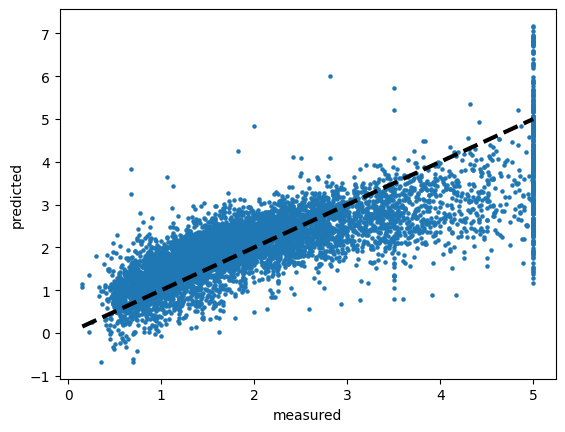

In [28]:
fir, ax = plt.subplots()
ax.scatter(y_test , y_test_pred , s=5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel("measured")
ax.set_ylabel("predicted")
plt.show()                                      